# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 5  AC209: GLMs


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai


<hr style="height:2pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

### Import Libraries

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson 
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

## <div class='exercise'> Question 1: Poisson regression [20 pts] </b> </div>

The probability density function of the Poisson distribution is given by:

$$ p(y|\lambda) =  \frac{\lambda^{y}}{y!} e^{-\lambda}$$


**1.1** Show that the Poisson distribution belongs to the general exponential distribution family with probability density:

$$f(y|\theta)= \exp\left( \frac{y  \,\theta-b(\theta)}{\phi}+c(y,\phi)\right)$$

**1.2** For the Poisson distribution, calculate the canonical parameter $\theta$ in terms of $\lambda$, the cumulant function $b(\theta)$, the dispersion parameter $\phi$, and the normalization function $c(y,\phi)$.

**1.3**  Show that the canonical link $g(.)$ for the Poisson regression model is given by:

$$\eta = g(\lambda) = \log(\lambda)$$

**1.4** Derive to the *normal equations* that maximizes the likelihood in the Poisson regression model.

**1.5** Write a function (name it `pois_loglik`) that returns the log-likelihood (either the positive or negative) for a simple Poisson regression model with one predictor (make sure you incorporate the canonical link properly to connect $\beta_0+\beta_1 X_1$ to $\lambda$).  The inputs should be `beta` (a vector), `X` (a matrix), and `y` (a vector), and a boolean `negative` with default option of `False` (that flags whether or not the negative value should be returned) and returns the log-likelihood evaluation.  **Note:** `X` and `beta` should include the intercept appropriately.

**Hint:** [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) may be helpful.

**1.6** Use an appropriate visual to explore whether `storms` is related to `watertemp` in the `atlanticstorms.csv` data set.  Use this visual to guess what values of $\beta_0$ and $\beta_1$ would be reasonable in a Poisson regression model.

**Hint:** Be careful as to the scale for this guess: be sure to take into account the canonical link connection between $\beta_0+\beta_1 X_1$ and $\lambda$.

**Note:** The `atlanticstorms.csv` data set contains annual counts of the number of tropical storms in the Atlantic Ocean (`storms`) along with the average water temperature in the Gulf of Mexico in June of that year (`watertemp`), measured as the deviation from average in degrees Fahrenheit.


**1.7** Use your `pois_loglik` function to get the maximum likelihood estimates for $\beta_0$ and $\beta_1$ fit to predict `storms` from `watertemp` in the `atlanticstorms.csv` data set.  Be explicit as to the initial starting value you decide on for $\beta_0$ and $\beta_1$ (for example, it may match your guesses from the previous part).

**Hint:** [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) may be helpful.


**1.8** Fit the standard linear regression model (feel free to use sklearn) to predict `np.log(storms)` from `watertemp` in the `atlanticstorms.csv` data set.  Compare the estimates for the coefficients in this model to the Poisson regression model.  What do these models say about the association between the number of storms in the Atlantic (on the original scale) and the water temperature in the Gulf of Mexico?

**Hint:** It might be useful to plot both model's curve (along with the scatterplot of the data) on the original scale.

<hr style="height:1pt"> 

## Question 1: Solutions



<div class='exercise-r'>

The probability density function of the Poisson distribution is given by:

$$ p(y|\lambda) =  \frac{\lambda^{y}}{y!} e^{-\lambda}$$


**1.1** Show that the Poisson distribution belongs to the general exponential distribution family with probability density:

$$f(y|\theta)= \exp\left( \frac{y  \,\theta-b(\theta)}{\phi}+c(y,\phi)\right)$$

</div>

To show that the Poisson distribution belongs to the general exponential distribution family, I will start my proof by rewriting the probability density function of the poisson distribution:

$$ p(y|\lambda) = p(Y=y) =  \frac{\lambda^{y}}{y!} e^{-\lambda}$$

I know that the euler number and that the natural logarithm are inverse functions. Meaning that taking them both together yields to the very same result. Meaning, I know that given an example number 8, if I take first the log and then the euler of the log, I in fact didn't do any transformation to my number 8, i.e. $e^{ln(8)} = 8$.  Given this property, I can play with them to rewrite the probability density function of the poisson distribution. 

Consequently, I will do:

$$ p(y|\lambda) = p(Y=y) = exp( ln( \frac{\lambda^{y}}{y!} e^{-\lambda}))$$



Additionally, I will make use of the properties of the logarithm in this rewriting process. I will make use of: $ln(\frac{a}{b}) = ln(a) - ln(b)$ and of $ln(a^{n})= n * ln{a}$

Let's do this step by step. Instead of doing everything together, first log and then euler of the log, let's take first the log and do this step by step:

$$ p(y|\lambda) = p(Y=y) = ln( \frac{\lambda^{y}}{y!} e^{-\lambda})$$
$$ = ln(\frac{\lambda^{y}}{y!}) - ln( e^{-\lambda}) $$
$$ = ln(\lambda^{y}) - ln( y!) - ln( e^{-\lambda}) $$
$$ = y* ln(\lambda) - ln( y!) -\lambda $$
$$ = y* ln(\lambda)  -\lambda - ln( y!)$$

Given the properties outlined above, I can further re-write this knowing that $e^{ln(\lambda)} = \lambda$

$$ = y* ln(\lambda) -  e^{ln(\lambda)} - ln( y!)$$


Now let's take the "second" step, i.e. the euler of all of this:

$$ = exp( y* ln(\lambda) -  e^{ln(\lambda)} - ln( y!))$$

$$ = exp( \frac{ y* ln(\lambda) -  e^{ln(\lambda)}}{1} - ln( y!))$$

From here I can see that $ p(y|\lambda) = exp( \frac{ y* ln(\lambda) -  e^{ln(\lambda)}}{1} - ln( y!))$ and that $f(y|\theta)= \exp\left( \frac{y  \,\theta-b(\theta)}{\phi}+c(y,\phi)\right)$ look very similar. This proofs that the poisson distribution belongs to the general exponential distribution family - where:

$$ \theta = log(\lambda)$$
$$ b(\theta) = \lambda = exp(\theta)$$
$$ c( y, \phi)= - log(y!)$$ 
consequently $$\phi = 1$$




















<div class='exercise-r'>

**1.2** For the Poisson distribution, calculate the canonical parameter $\theta$ in terms of $\lambda$, the cumulant function $b(\theta)$, the dispersion parameter $\phi$, and the normalization function $c(y,\phi)$.

</div>

As discussed above in 1.1: 
$$ \theta = log(\lambda)$$
$$ b(\theta) = \lambda = exp(\theta)$$
$$ c( y, \phi)= - log(y!)$$ 
$$\phi = 1$$

<div class='exercise-r'>

**1.3**  Show that the canonical link $g(.)$ for the Poisson regression model is given by:

$$\eta = g(\lambda) = \log(\lambda)$$
    
</div>

Given that: 

$$b'(\theta)=\mu$$

Let's rewrite this in term of what we found above. Meaning: 

$$b'(\theta) = exp(\theta)= exp(ln(\lambda))   = \lambda, $$

hence $\mu = \lambda$ where $\theta = log(\lambda)$.




Therefore if, given that: $$g(\mu) = \theta$$

and, that from above: 
$$log(\lambda) = \theta  $$

it follows that my canonical link function g(.) is the log(.) function:

$$\eta = g(\mu) = g(\lambda) = log(\lambda) = \theta$$

and that my linear predictor is $$ \eta = \theta = x^{T}\beta$$

<div class='exercise-r'>

**1.4** Derive to the *normal equations* that maximizes the likelihood in the Poisson regression model.
    
</div>

From (slide 26 of advanced section slides): 

$$\sum_{i=1}^{n} \frac{(y_{i} - \mu_{i}) x^{T}_{i}}{\phi_{i}} = 0$$

We can gradually step by step insert what we know about the poission distribution:

$$\sum_{i=1}^{n}\frac{(y_{i} - \lambda_{i}) x^{T}_{i}}{\phi_{i}} = 0$$

$$\sum_{i=1}^{n} \frac{(y_{i} - exp(\theta)) x^{T}_{i}}{\phi_{i}} = 0$$

$$\sum_{i=1}^{n}\frac{(y_{i} - exp(\eta)) x^{T}_{i}}{\phi_{i}} = 0$$


Which follows that:


$$\sum_{i=1}^{n} \frac{(y_{i} - exp(x^{T}\beta)) x^{T}_{i}}{\phi_{i}} = 0$$

$$\sum_{i=1}^{n} \frac{(y_{i} - exp(x^{T}\beta)) x^{T}_{i}}{1} = 0$$

<div class='exercise-r'>

**1.5** Write a function (name it `pois_loglik`) that returns the log-likelihood (either the positive or negative) for a simple Poisson regression model with one predictor (make sure you incorporate the canonical link properly to connect $\beta_0+\beta_1 X_1$ to $\lambda$).  The inputs should be `beta` (a vector), `X` (a matrix), and `y` (a vector), and a boolean `negative` with default option of `False` (that flags whether or not the negative value should be returned) and returns the log-likelihood evaluation.  **Note:** `X` and `beta` should include the intercept appropriately.

**Hint:** [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) may be helpful.

</div>

Let's first define what I have to code: I want to write down the log likeihood for a simple poisson regression model.

Let's first define the Likelihood $L$ as: $$L = \prod  \frac{\lambda^{y}}{y!} e^{-\lambda} $$

The log likelihood is the log of L, hence:

$$ l = log(L) = log( \prod  \frac{\lambda^{y}}{y!} e^{-\lambda} ) $$
$$ = \sum( log \frac{\lambda^{y}}{y!} e^{-\lambda} ) $$

$$ = \sum(y * log(\lambda)- (log(y!)) - \sum(\lambda)  $$



I know from above that: 

$$\lambda = e^{\theta} = e^{\eta} = e^{x^{T}\beta}$$
$$ln(\lambda )= \theta = \eta = x^{T}\beta$$


Hence:

$$ l = log(L) =   \sum(y * (x^{T}\beta) - log(y!)) - \sum(e^{x^{T}\beta})  $$





In [3]:

import scipy.special as special
import math
    
def pois_loglik(beta, X, y, negative = False):
    my_lambda = np.exp(X@beta.T)
    log_likelihood=0
    my_lambda = np.exp(X@beta.T)
    #print(my_lambda.shape)
    
    for i in range(len(y)):
        distribution = poisson.pmf(y[i], my_lambda[i])
        log_likelihood = log_likelihood + np.log(distribution)
        
    neg_log_likelihood = (-1)*log_likelihood
    if negative == True:
        return neg_log_likelihood
    else:
        return log_likelihood
    
#poisson.logmf


<div class='exercise-r'>

**1.6** Use an appropriate visual to explore whether `storms` is related to `watertemp` in the `atlanticstorms.csv` data set.  Use this visual to guess what values of $\beta_0$ and $\beta_1$ would be reasonable in a Poisson regression model.

**Hint:** Be careful as to the scale for this guess: be sure to take into account the canonical link connection between $\beta_0+\beta_1 X_1$ and $\lambda$.

**Note:** The `atlanticstorms.csv` data set contains annual counts of the number of tropical storms in the Atlantic Ocean (`storms`) along with the average water temperature in the Gulf of Mexico in June of that year (`watertemp`), measured as the deviation from average in degrees Fahrenheit.
    
</div>

In [4]:
# your code here

df = pd.read_csv('./data/atlanticstorms.csv')
#df.head()

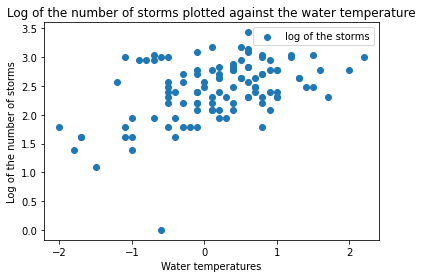

In [5]:
x = df['watertemp']
y = df[['storms']]
plt.scatter(x, np.log(y),  label = 'log of the storms')
plt.xlabel("Water temperatures")
plt.ylabel("Log of the number of storms")
plt.title("Log of the number of storms plotted against the water temperature")
plt.legend()
plt.show()

**INTERPRETATION:**

Given that in the Poisson regression $ E(y|x) = \mu = \lambda $ and given that we know from above that $\lambda = e^{\theta} = e^{\eta} = e^{x^{T} \beta}$, it means that we are dealing with a Generalised Linear Model where:

$$ E(y|x)  = e^{x^{T} \beta} $$

Consequently, I plotted the log of y (i.e. the log of the storms), to try to see if there is a linear relationship with X, which seems to be the case from the scatter plot above.

If I have to eye-ball and estimate possible $\beta_{0}$ and $\beta_{1}$ values, I would say that a reasonable $\beta_{0}$ could be 1.5 and a reasonable $\beta_{1}$ could be 0.2.

By playing with np.linspace and some possible values, a more possible estimate of $\beta_{0}$ could be 2.5 and a reasonable $\beta_{1}$ could be 0.3.

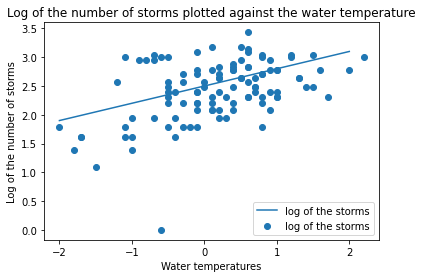

In [6]:
x = df['watertemp']
y = df[['storms']]

x_linspace = np.linspace(-2, 2, 1000)
y_estimate = 2.5 + 0.3*x_linspace

plt.scatter(x, np.log(y),  label = 'log of the storms')
plt.plot(x_linspace, y_estimate,  label = 'log of the storms')
plt.xlabel("Water temperatures")
plt.ylabel("Log of the number of storms")
plt.title("Log of the number of storms plotted against the water temperature")
plt.legend()
plt.show()



<div class='exercise-r'>

**1.7** Use your `pois_loglik` function to get the maximum likelihood estimates for $\beta_0$ and $\beta_1$ fit to predict `storms` from `watertemp` in the `atlanticstorms.csv` data set.  Be explicit as to the initial starting value you decide on for $\beta_0$ and $\beta_1$ (for example, it may match your guesses from the previous part).

**Hint:** [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) may be helpful.
    
</div>

In [7]:
beta = np.array([[0.3, 2.5]])

x_water = df[['watertemp']]
df['ones'] = pd.Series([1 for x in range(len(df.index))])
x_water = df[['ones', 'watertemp']]
y_storms = df['storms']


In [8]:
beta = np.array([2.5, 0.3])

neg_log = pois_loglik(beta, x_water, y_storms, negative = True)
neg_log

355.6284741919554

In [9]:
minimize(pois_loglik, (2.5,1), args = (x_water, y_storms, True)  )

      fun: 351.39135185596575
 hess_inv: array([[ 3.49245965e-10, -2.03726813e-10],
       [-2.03726813e-10,  1.42194892e-04]])
      jac: array([3.81469727e-06, 2.28881836e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 63
      nit: 13
     njev: 21
   status: 2
  success: False
        x: array([2.49404109, 0.21303936])

In [10]:
beta1 = 0.21303936
beta0 = 2.4944041

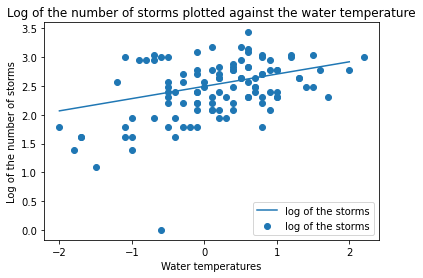

In [11]:
x = df['watertemp']
y = df[['storms']]

x_linspace = np.linspace(-2, 2, 1000)
y_estimate = beta0+ beta1*x_linspace

plt.scatter(x, np.log(y),  label = 'log of the storms')
plt.plot(x_linspace, y_estimate,  label = 'log of the storms')
plt.xlabel("Water temperatures")
plt.ylabel("Log of the number of storms")
plt.title("Log of the number of storms plotted against the water temperature")
plt.legend()
plt.show()



#print(np.exp(beta0))
#print(np.exp(beta1))

<div class='exercise-r'>

**1.8** Fit the standard linear regression model (feel free to use sklearn) to predict `np.log(storms)` from `watertemp` in the `atlanticstorms.csv` data set.  Compare the estimates for the coefficients in this model to the Poisson regression model.  What do these models say about the association between the number of storms in the Atlantic (on the original scale) and the water temperature in the Gulf of Mexico?

**Hint:** It might be useful to plot both model's curve (along with the scatterplot of the data) on the original scale.

</div>

In [12]:
# your code here
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=121) 

x_train = df[['watertemp']]
y_train = df['storms']

x_test = df[['watertemp']]
y_test = df['storms']
y_test_ln = np.log(y_test)

lin_reg = LinearRegression()
lin_reg.fit(x_train, np.log(y_train))
y_pred_test = lin_reg.predict(x_test)


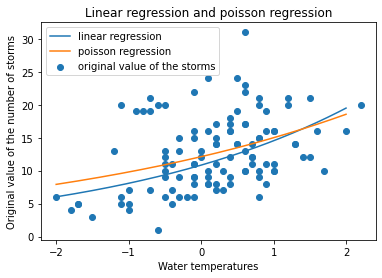

The beta1 out of the linear regression with the log of storms as y is: 0.2936
The beta0 out of the linear regression with the log of storms as y is: 2.3826
The beta1 out of the linear regression without the log of storms as y is: 1.3412
The beta0 out of the linear regression without the log of storms as y is: 10.8335


In [13]:
#plotting

x_linspace = np.linspace(-2, 2, 1000)
y_pred_test = lin_reg.predict(x_linspace.reshape(-1,1))

beta1 = 0.21303936
beta0 = 2.4944041

x = df['watertemp']
y = df[['storms']]

x_linspace = np.linspace(-2, 2, 1000)
y_estimate = beta0+ beta1*x_linspace


plt.scatter(x, np.exp(np.log(y)),  label = 'original value of the storms')
plt.plot(x_linspace, np.exp(y_pred_test), label = 'linear regression')
plt.plot(x_linspace, np.exp(y_estimate),  label = 'poisson regression')
plt.xlabel("Water temperatures")
plt.ylabel("Original value of the number of storms")
plt.title("Linear regression and poisson regression")
plt.legend()
plt.show()


print(f"The beta1 out of the linear regression with the log of storms as y is: { lin_reg.coef_[0]:.4f}")
print(f"The beta0 out of the linear regression with the log of storms as y is: {lin_reg.intercept_:.4f}")

print(f"The beta1 out of the linear regression without the log of storms as y is: {np.exp(lin_reg.coef_)[0]:.4f}")
print(f"The beta0 out of the linear regression without the log of storms as y is: {np.exp(lin_reg.intercept_):.4f}")


#one unit deviation of the water temp, is equivalent to 1 extra storm (where the 1 comes from the exp of the beta 1)

**INTERPRETATION:**

The linear regression indicates a different relationship between water temperature and the number of storms is stronger compared to the relationship that the poisson regression indicates. Both models say that the higher the water temperatures, the higher the number of storms. However, the poisson says that less than the linear regression model.

The linear regression estimates a different relationship between the water temperature and the number of storms because we know that the count of tropical storms in a given year is poisson distributed, and not normally distributed.

#### THE END